In [167]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Question 1
1. Write a python function program to demonstrate the working of the decision tree based C4.5 algorithms
without using scikit-learn library. Use following data set for building the decision tree and apply this
knowledge to classify a new sample.
The dataset has three attributes: Outlook (Sunny, Overcast, Rainy), Temperature, Humidity and Wind (Weak,
Strong). The target attribute is Play Tennis (Yes/No).

In [168]:
df = pd.read_csv('data1.csv')
df2 = df.drop(columns=['Day'])
cat={1:'Yes',0:'No'}
df2

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,85,85,Weak,No
1,Sunny,80,90,Strong,No
2,Overcast,83,78,Weak,Yes
3,Rain,70,96,Weak,Yes
4,Rain,68,80,Weak,Yes
5,Rain,65,70,Strong,No
6,Overcast,64,65,Strong,Yes
7,Sunny,72,95,Weak,No
8,Sunny,69,70,Weak,Yes
9,Rain,75,80,Weak,Yes


In [169]:
def fit(data, algorithm='C4.5',y_label='Decision'):
    return build_tree(data, algorithm,y_label)

def build_tree(data, algorithm,y_label):
    if len(data[y_label].unique()) == 1:
        return data[y_label].iloc[0]

    if len(data.columns) == 1:
        return data[y_label].mode()[0]

    best_feature, best_value = best_split(data, algorithm,y_label)
    if best_feature is None:
        return data[y_label].mode()[0]

    left_split = data[data[best_feature] <= best_value]
    right_split = data[data[best_feature] > best_value]

    left_tree = build_tree(left_split.drop(columns=[best_feature]), algorithm,y_label)
    right_tree = build_tree(right_split.drop(columns=[best_feature]), algorithm,y_label)

    return {best_feature: {'value': best_value, 'left': left_tree, 'right': right_tree}}

def best_split(data, algorithm,y_label):
    best_score = float('inf') if algorithm == 'CART' else -float('inf')
    best_feature = None
    best_value = None

    for feature in data.columns[:-1]:
        thresholds = data[feature].unique()
        for threshold in thresholds:
            left_split = data[data[feature] <= threshold]
            right_split = data[data[feature] > threshold]

            if left_split.empty or right_split.empty:
                continue

            if algorithm == 'C4.5':
                gain = information_gain(data, left_split, right_split,y_label)
                if gain > best_score:
                    best_score = gain
                    best_feature = feature
                    best_value = threshold
            elif algorithm == 'CART':
                gini = gini_index(left_split, right_split,y_label)
                if gini < best_score:
                    best_score = gini
                    best_feature = feature
                    best_value = threshold

    return best_feature, best_value


In [170]:
def information_gain(parent, left, right,y_label):
    total_length = len(parent)
    if total_length == 0:
        return 0

    parent_entropy = entropy(parent,y_label)
    left_entropy = entropy(left,y_label)
    right_entropy = entropy(right,y_label)

    weighted_entropy = (len(left) / total_length) * left_entropy + (len(right) / total_length) * right_entropy
    return parent_entropy - weighted_entropy

def entropy(data,y_label):
    label_counts = data[y_label].value_counts()
    probabilities = label_counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))


In [171]:
def predict(sample, tree):
    return classify(sample, tree)

def classify(sample, tree):
    if not isinstance(tree, dict):
        return tree

    feature = next(iter(tree))
    threshold = tree[feature]['value']
    
    if sample[feature] <= threshold:
        return classify(sample, tree[feature]['left'])
    else:
        return classify(sample, tree[feature]['right'])

In [172]:
df2['Outlook'] = df2['Outlook'].astype('category').cat.codes
df2['Wind'] = df2['Wind'].astype('category').cat.codes
df2['Decision'] = df2['Decision'].map({'Yes': 1, 'No': 0})

tree_c45 = fit(df2, algorithm='C4.5')

new_sample = {'Outlook': 0, 'Temp.': 75, 'Humidity': 70, 'Wind': 1}  # Encoded values
prediction_c45 = predict(new_sample, tree_c45)
print(f'C4.5 Prediction: {"Yes" if prediction_c45 == 1 else "No"}')

C4.5 Prediction: Yes


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The predicted decision for the new sample is: Yes


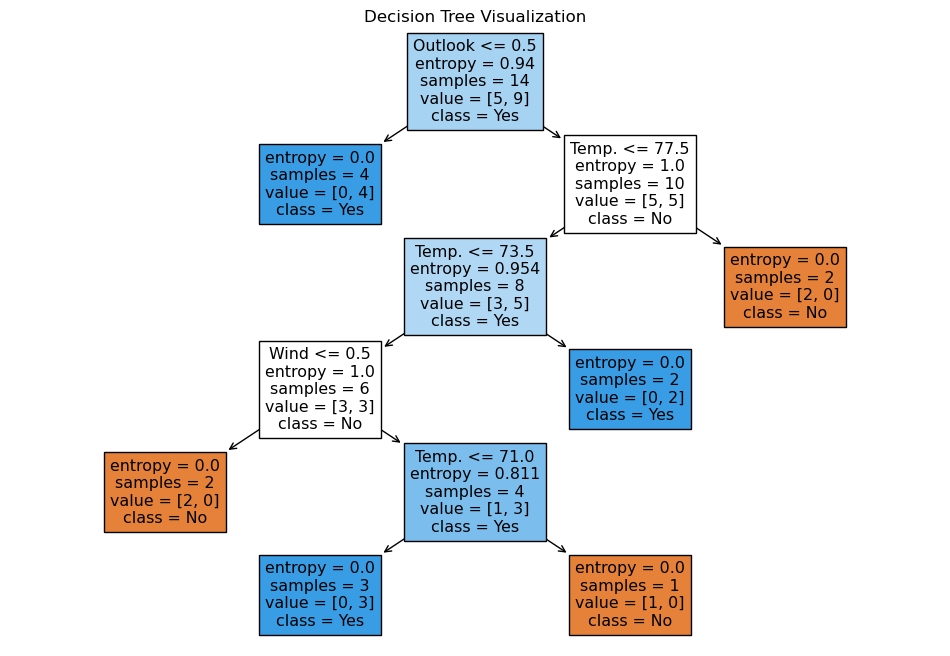

In [173]:
#with sklearn
X = df2[['Outlook', 'Temp.', 'Humidity', 'Wind']]
y = df2['Decision']

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

new_sample1 = [[0, 75, 70, 1]]
prediction = clf.predict(new_sample1)

print(f'The predicted decision for the new sample is: {"Yes" if prediction[0] == 1 else "No"}')

# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Outlook', 'Temp.', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Question 2
Write a python function program to demonstrate the working of the decision tree based CART algorithms
without using scikit-learn library. Use Q. No. 1 data set for building the decision tree and apply this knowledge
to classify a new sample.
The dataset has three attributes: Outlook (Sunny, Overcast, Rainy), Temperature, Humidity and Wind (Weak,
Strong). The target attribute is Play Tennis (Yes/No)

In [174]:
def gini_index(left, right,y_label):
    total_length = len(left) + len(right)
    if total_length == 0:
        return 0

    left_gini = 1 - sum((left[y_label].value_counts(normalize=True) ** 2).fillna(0))
    right_gini = 1 - sum((right[y_label].value_counts(normalize=True) ** 2).fillna(0))

    gini = (len(left) / total_length) * left_gini + (len(right) / total_length) * right_gini
    return gini


In [175]:
tree_cart = fit(df2, algorithm='CART')

prediction_cart = predict(new_sample, tree_cart)
print(f'CART Prediction: {"Yes" if prediction_cart == 1 else "No"}')


CART Prediction: Yes


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The predicted decision for the new sample is: Yes


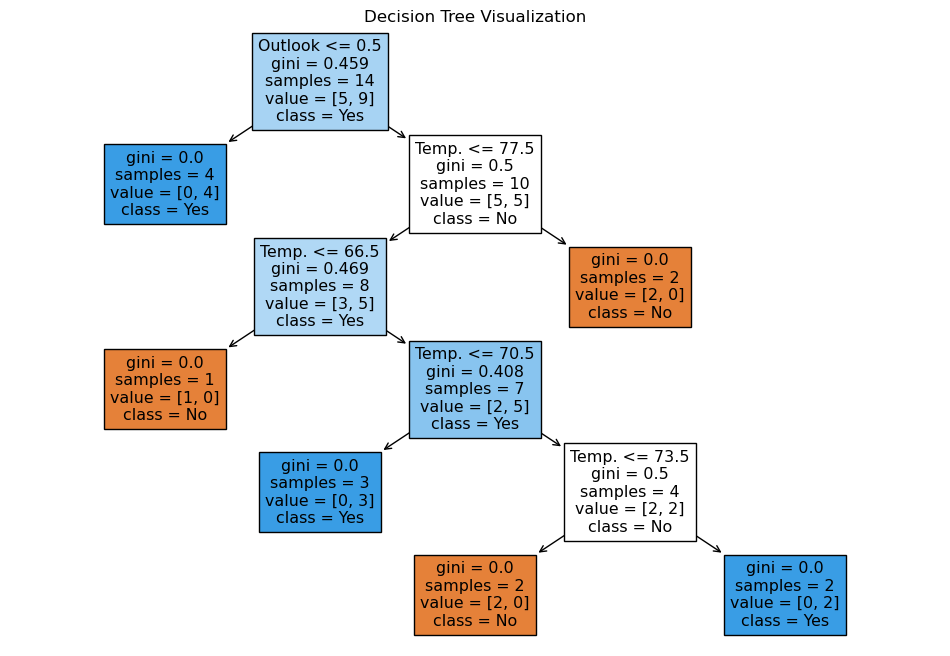

In [176]:
#with sklearn
clf = DecisionTreeClassifier(criterion='gini')  
clf.fit(X, y)
prediction = clf.predict(new_sample1)
print(f'The predicted decision for the new sample is: {"Yes" if prediction[0] == 1 else "No"}')


plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Outlook', 'Temp.', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Question 3
Write a python function program to demonstrate the working of the decision tree based C4.5 and CART
algorithms without and with using scikit-learn library. Using the following dataset, apply aforementioned
algorithms. The attributes are Income (Low, Medium, High) and Credit (Good, Bad), and the target is Loan
Approved (Yes/No).

In [182]:
df3=pd.read_csv('data2.csv')
df3

,Income,Credit,LoanApproved
0,Low,Good,Yes
1,Low,Bad,No
2,Medium,Good,Yes
3,Medium,Bad,Yes
4,High,Good,Yes
5,High,Bad,No


In [183]:
income_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df3['Income'] = df3['Income'].map(income_mapping)
df3['Credit'] = df3['Credit'].astype('category').cat.codes
df3['LoanApproved'] = df3['LoanApproved'].map({'Yes': 1, 'No': 0})
df3

,Income,Credit,LoanApproved
0,0,1,1
1,0,0,0
2,1,1,1
3,1,0,1
4,2,1,1
5,2,0,0


In [193]:
y_label = 'LoanApproved'

# Fit your C4.5 and CART trees
tree_c45 = fit(df3, 'C4.5', 'LoanApproved')
new_sample2 = {'Income': 1, 'Credit': 1} 
prediction_c45 = predict(new_sample2, tree_c45)
print(f'C4.5 Prediction: {"Yes" if prediction_c45 == 1 else "No"}')

tree_cart = fit(df3, 'CART', y_label)
prediction_cart = predict(new_sample2, tree_cart)
print(f'CART Prediction: {"Yes" if prediction_cart == 1 else "No"}')


C4.5 Prediction: Yes
CART Prediction: Yes


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Scikit-Learn C4.5 Prediction: Yes
Scikit-Learn CART Prediction: Yes


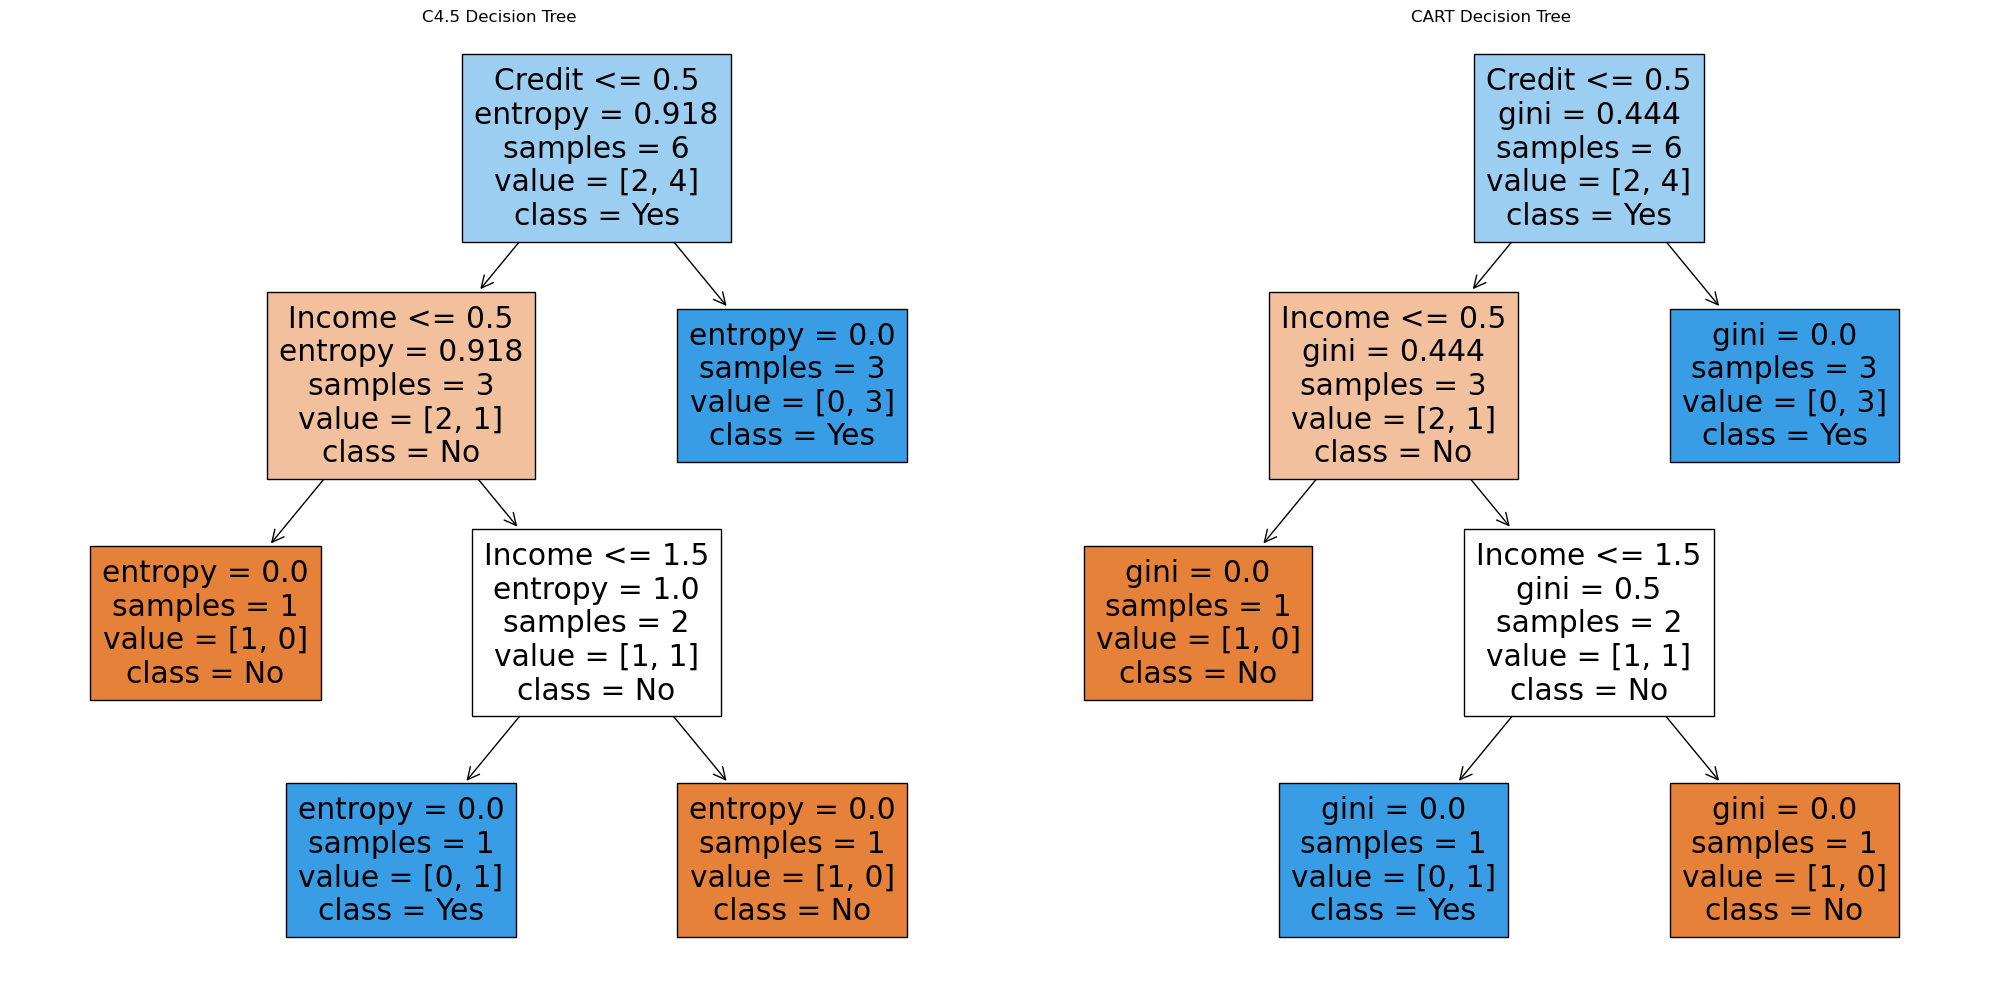

In [186]:
X = df3[['Income', 'Credit']]
y = df3['LoanApproved']

clf_c45 = DecisionTreeClassifier(criterion='entropy')
clf_c45.fit(X, y)
prediction_sklearn_c45 = clf_c45.predict([[1, 0]])  # Encoded values for Medium Income, Good Credit
print(f'Scikit-Learn C4.5 Prediction: {"Yes" if prediction_sklearn_c45[0] == 1 else "No"}')

clf_cart = DecisionTreeClassifier(criterion='gini')
clf_cart.fit(X, y)
prediction_sklearn_cart = clf_cart.predict([[1, 0]])  # Same sample for comparison
print(f'Scikit-Learn CART Prediction: {"Yes" if prediction_sklearn_cart[0] == 1 else "No"}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plot_tree(clf_c45, feature_names=['Income', 'Credit'], class_names=['No', 'Yes'], filled=True, ax=axes[0])
axes[0].set_title("C4.5 Decision Tree")
plot_tree(clf_cart, feature_names=['Income', 'Credit'], class_names=['No', 'Yes'], filled=True, ax=axes[1])
axes[1].set_title("CART Decision Tree")
plt.tight_layout()
plt.show()